In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
import squarify
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from random import sample
from sklearn.utils import shuffle

In [16]:
df = pd.read_csv('features_generated_filtered.csv', delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256294 entries, 0 to 256293
Columns: 138 entries, Unnamed: 0 to final_critical_index
dtypes: float64(79), int64(55), object(4)
memory usage: 269.8+ MB


In [17]:
sample_frud = df.sample(n=500)

data_set_testing = df[df.is_fraud == 0].sample(frac=0.004)
entry_fraud = df.loc[df.is_fraud == 1].sample(frac=0.3)
data_set = pd.concat([data_set_testing,entry_fraud])
#data_set.head()
#len(df.index)
test_user = shuffle(data_set)

#data_set.to_csv('sample_data.csv',index=False)
print(len(data_set.index))

1234


In [20]:
int_vars = ['suspicious_failure_rate','sus_banker_res','fail_3ds','suspicious_tm_trans','suspecious_credit_trans','sus_attempts_perday','sus_attempts_perday_high_amounts','sus_attempts_perday_high_sum','sus_attempts_perday_test_transactions','suspecious_card_usage',
            'm_suspicious_failure_rate','m_sus_banker_res','m_fail_3ds','m_suspicious_tm_trans','m_suspecious_credit_trans','m_sus_attempts_perday','m_sus_attempts_perday_high_amounts','m_sus_attempts_perday_high_sum','m_sus_attempts_perday_test_transactions','m_suspecious_card_usage',
            'w_suspicious_failure_rate','w_sus_banker_res','w_fail_3ds','w_suspicious_tm_trans','w_suspecious_credit_trans','w_sus_attempts_perday','w_sus_attempts_perday_high_amounts','w_sus_attempts_perday_high_sum','w_sus_attempts_perday_test_transactions','w_suspecious_card_usage']
test_user.replace([np.inf, -np.inf], np.nan)
test_user = test_user.fillna(0)
test_user[int_vars] = test_user[int_vars].astype(int) 

In [21]:
scaler = StandardScaler()
#data_set.drop(["payerAccNo","unique_id"], inplace=True, axis=1)
#data_set.dropna(axis=1, how='all')
#data_set.replace(np.inf, 0, inplace=True)
#data_set.replace([np.inf, -np.inf], np.nan)
test_user['createdAt']=pd.to_datetime(test_user.createdAt)
test_user['createdAt'] = test_user.createdAt.values.astype(np.int64)
test_user['transaction_date']=pd.to_datetime(test_user.transaction_date)
test_user['transaction_time']=pd.to_datetime(test_user.transaction_time)
test_user['transaction_date'] = test_user['transaction_date'].apply(lambda x: x.value)
test_user['transaction_time'] = test_user['transaction_time'].apply(lambda x: x.value)

cat_vars = ['funding_method','secure_3ds','success_3ds','status','type','currency','amount_high','suspicious_time','high_risk_credit_transaction','bank_approved','bank_err','bank_invalid_card','bank_insufficient_fund','bank_do_not_honor','bank_lost_card','channel_visa','channel_master','channel_amex',
            'initialized_api','initialized_session','initialized_plugin','initialized_ext_api','initialized_ipg','is_fraud']

#data_set[cat_vars] = data_set[cat_vars].astype(str) 

#avg_failed_amt,m_avg_failed_amt,w_avg_failed_amt
con_vars = ['payerAccountNumber','payerIdTransformed','payeeIdTransformed','originalAmount','createdAt','transaction_date','transaction_time','issuer_bank','ip_address','browser',
           'recency','frequency','total_value','merchant_frequency','secure_3ds_count','success_3ds_count','diff_brouser_count','success_count','one_time_count','lkr_trans','tot_amount_high','tot_suspiciout_tm_trans','tot_high_risk_credit_trans',
            'tot_bank_approves','tot_bank_err','tot_invalid_card','tot_insufficient_fund','tot_bank_do_not_honor','tot_bank_lost_card','tot_success_amt',
           'success_percent','avg_success_amt','tot_credit_card_trans',
           'm_recency','m_frequency','m_total_value','m_merchant_frequency','m_secure_3ds_count','m_success_3ds_count','m_diff_brouser_count','m_success_count','m_one_time_count','m_lkr_trans','m_tot_amount_high','m_tot_suspiciout_tm_trans','m_tot_high_risk_credit_trans','m_tot_bank_approves','m_tot_bank_err','m_tot_invalid_card','m_tot_insufficient_fund',
           'm_tot_bank_do_not_honor','m_tot_bank_lost_card','m_tot_success_amt','m_success_percent','m_avg_success_amt','m_tot_credit_card_trans', 
          'w_recency','w_frequency','w_total_value','w_merchant_frequency','w_secure_3ds_count','w_success_3ds_count','w_diff_brouser_count','w_success_count','w_one_time_count','w_lkr_trans','w_tot_amount_high','w_tot_suspiciout_tm_trans','w_tot_high_risk_credit_trans',
          'w_tot_bank_approves','w_tot_bank_err','w_tot_invalid_card','w_tot_insufficient_fund','w_tot_bank_do_not_honor','w_tot_bank_lost_card','w_tot_success_amt','w_success_percent','w_avg_success_amt','w_tot_credit_card_trans',
            
            'final_critical_index']

#data_set.fillna(data_set.mean(), inplace=True)

#numeric_cols = list(data_set.dtypes[data_set.dtypes != 'object'].index)
#data_set.loc[:,numeric_cols] = scaler.fit_transform(data_set.loc[:,numeric_cols])
#data_set[numeric_cols]  =round(data_set[numeric_cols],10)

test_user[con_vars]=scaler.fit_transform(test_user[con_vars])
test_user[con_vars]  =round(test_user[con_vars],10)
test_user_y = test_user.is_fraud
test_user.drop(["Unnamed: 0","avg_failed_amt","m_avg_failed_amt","w_avg_failed_amt","critical_index","m_critical_index","w_critical_index","unique_id","payerAccNo","is_fraud"], inplace=True, axis=1)
test_user.to_csv('test_data_standerdize.csv',index=False)


In [22]:
featuer_engineering_df = pd.read_csv('feature_engineering_filtered_standerdize.csv', delimiter=",")

In [23]:
X = featuer_engineering_df.drop(['is_fraud'],axis=1)
y = featuer_engineering_df.is_fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
models = []
models.append(("XGB",XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')))

In [25]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [26]:
name="XGB"
model = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

XGBClassifier


XGB [0.99760878 0.99749172 0.9978094 ]
=== Mean Accuracy ===
Mean Accuracy Score -:  0.997636633163892


XGB [0.98518376 0.98858784 0.98458317]
=== Mean AUC Score ===
Mean AUC Score -:  0.9861182581309232


=== Confusion Matrix ===
[[1022    0]
 [ 212    0]]




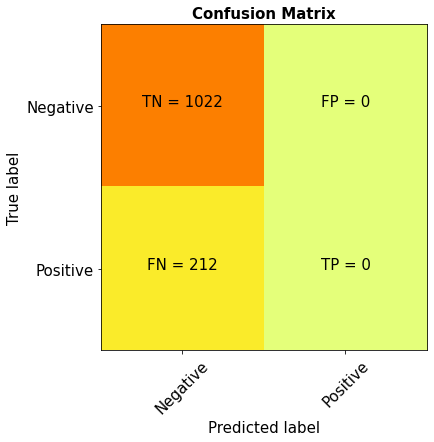

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1022
           1       0.00      0.00      0.00       212

    accuracy                           0.83      1234
   macro avg       0.41      0.50      0.45      1234
weighted avg       0.69      0.83      0.75      1234



                                  feature  importance
71              m_tot_suspiciout_tm_trans    0.110606
37                tot_suspiciout_tm_trans    0.107060
2                      payeeIdTransformed    0.095876
56  sus_attempts_perday_test_transactions    0.034636
34                         one_time_count    0.033054
..                                    ...         ...
92                m_suspecious_card_usage    0.000000
96                   w_merchant_frequency    0.000000
98                     w_secure_3ds_count    0.000000
99                    w_success_3ds_count    0.000000
64                     m_secure_3ds_count    0.

/Users/directpay/mambaforge/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/directpay/mambaforge/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/directpay/mambaforge/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [1234, 76889]

In [27]:
kfold = KFold(n_splits=3, random_state=1,shuffle=True)
cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
roc_auc_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "roc_auc")
print(model.__class__.__name__,)
print('\n')
print(name, cv_result)
print("=== Mean Accuracy ===")
print("Mean Accuracy Score -: ", cv_result.mean())
print('\n')
print(name, roc_auc_result)
print("=== Mean AUC Score ===")
print("Mean AUC Score -: ", roc_auc_result.mean())
print('\n')
model.fit(X_train, y_train)
# predictions
#actual=y_test
#predict = model.predict(X_test)
actual=test_user_y
predict=model.predict(test_user)
    
print("=== Confusion Matrix ===")
cm = confusion_matrix(actual,predict)
print(cm)
print('\n')
    
plt.figure(figsize=(8,6))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix',fontsize=15,fontweight='bold')
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45,fontsize=15)
plt.yticks(tick_marks, classNames,fontsize=15)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),horizontalalignment="center",fontsize=15)
plt.show()
    
print("=== Classification Report ===")
print(classification_report(actual,predict))
print('\n')
    
importances=model.feature_importances_
fi = pd.DataFrame({'feature': list(X_train.columns),'importance': model.feature_importances_}).sort_values('importance', ascending = False)
 # Display
print(fi)

# Probabilities for each class
probs = model.predict_proba(X_test)[::, 1]
#auc = roc_auc_score(y_test, yproba)
#fpr, tpr, thresholds = roc_curve(actual,  predict)
#roc_auc = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(actual,  probs)
roc_auc = roc_auc_score(actual,  probs)
result_table = result_table.append({'classifiers':"original - "+model.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':roc_auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

In [12]:
model_prediction = model.predict_proba(test_user)[::, 1]

In [13]:
print(model_prediction>0.5.astype)

[2.637751e-03 5.535949e-05]


In [14]:
print(model.classes_)

[0 1]


In [16]:
predic_class = model.predict_classes(test_user)[::, 1]

AttributeError: 'XGBClassifier' object has no attribute 'predict_classes'

In [ ]:
print("X=%s, Predicted=%s" % (test_user, predic_class))

In [17]:
print(model.predict>0.5.astype('int32'))



AttributeError: 'float' object has no attribute 'astype'